# NAMA    : AGUNG REYNALDI AVIZENA <BR>NIM     : 1103204044 <BR>TUGAS KE-6

In [36]:
# import library
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [37]:
# Mengabaikan semua peringatan
warnings.filterwarnings('ignore')

In [38]:
# load dataset
dataset = "C:/Users/agung/Semester 7/Data Sains dan Analisis/Pertemuan 5/Iris.csv"
df = pd.read_csv(dataset)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [40]:
# Menghapus kolom CustomerID dan Genre
df = df.drop(['Id', 'Species'], axis=1)

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
# Mengubah nama kolom
df = df.rename(columns={'SepalLengthCm': 'Sepal Length', 'SepalWidthCm': 'Sepal Width', 'PetalLengthCm':'Petal Length','PetalWidthCm':'Petal Width'})

df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [42]:
X = df[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']]

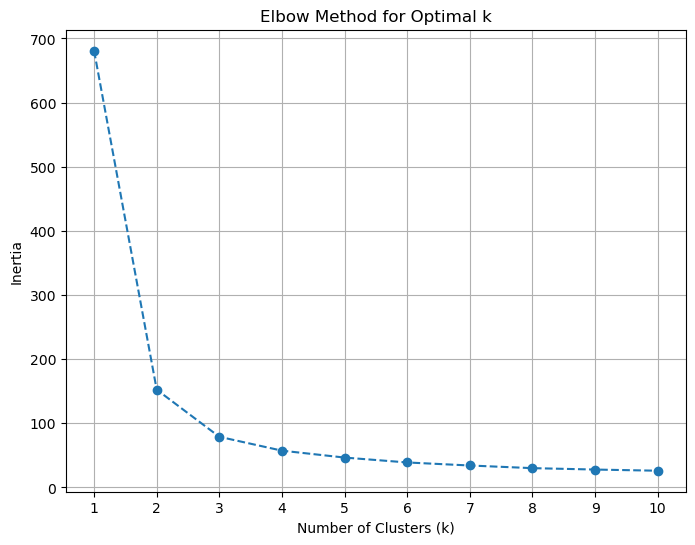

In [43]:
# Nilai K maksimuim
max_k = 11

# Menyimpan inertia (sum of squared distances to the closest centroid) untuk setiap nilai k
inertia = []
for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Memvisualisasikan Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

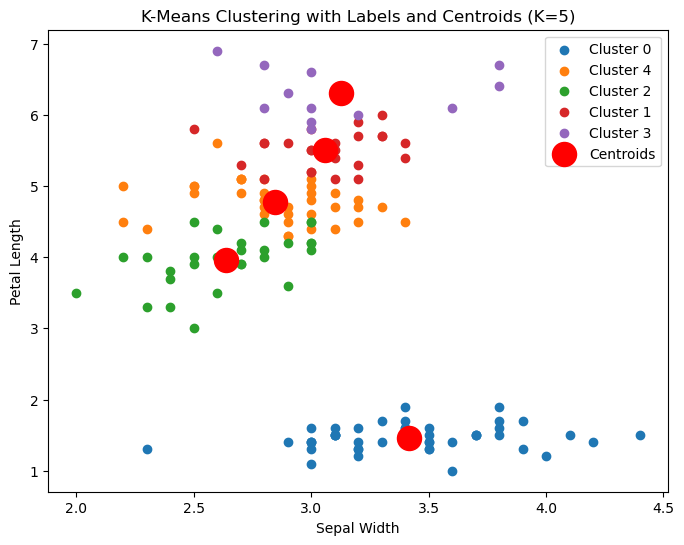

In [44]:
# Menginisialisasi model K-Means dengan K=5
kmeans = KMeans(n_clusters=5, random_state=0)

# Melakukan clustering
df['Label'] = kmeans.fit_predict(X)

# Mendapatkan koordinat sentroid dari setiap cluster
centroids = kmeans.cluster_centers_

# Menambahkan sentroid ke dalam DataFrame
df_centroids = pd.DataFrame(centroids, columns=['Centroid Sepal Length', 'Centroid Sepal Width', 'Centroid Petal Length', 'Centroid Petal Width'])

# Visualisasi hasil clustering berdasarkan label dengan sentroid
plt.figure(figsize=(8, 6))
for label in df['Label'].unique():
    cluster_data = df[df['Label'] == label]
    plt.scatter(cluster_data['Sepal Width'], cluster_data['Petal Length'], label=f'Cluster {label}')

# Menambahkan sentroid ke dalam plot
plt.scatter(df_centroids['Centroid Sepal Width'], df_centroids['Centroid Petal Length'], color='red', marker='o', s=300, label='Centroids')

plt.title('K-Means Clustering with Labels and Centroids (K=5)')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')
plt.legend()
plt.show()


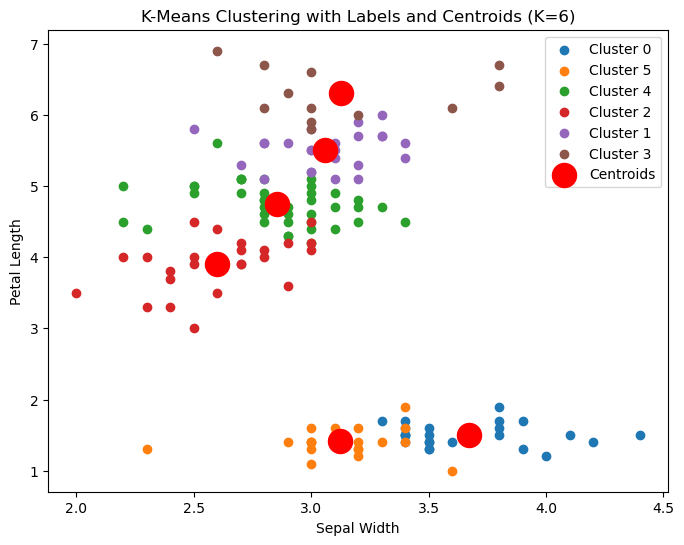

In [45]:
# Menginisialisasi model K-Means dengan K=6
kmeans = KMeans(n_clusters=6, random_state=0)

# Melakukan clustering
df['Label'] = kmeans.fit_predict(X)

# Mendapatkan koordinat sentroid dari setiap cluster
centroids = kmeans.cluster_centers_

# Menambahkan sentroid ke dalam DataFrame
df_centroids = pd.DataFrame(centroids, columns=['Centroid Sepal Length', 'Centroid Sepal Width', 'Centroid Petal Length', 'Centroid Petal Width'])

# Visualisasi hasil clustering berdasarkan label dengan sentroid
plt.figure(figsize=(8, 6))
for label in df['Label'].unique():
    cluster_data = df[df['Label'] == label]
    plt.scatter(cluster_data['Sepal Width'], cluster_data['Petal Length'], label=f'Cluster {label}')

# Menambahkan sentroid ke dalam plot
plt.scatter(df_centroids['Centroid Sepal Width'], df_centroids['Centroid Petal Length'], color='red', marker='o', s=300, label='Centroids')

plt.title('K-Means Clustering with Labels and Centroids (K=6)')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')
plt.legend()
plt.show()


In [46]:
for k in range(2, max_k):
    # Inisialisasi model K-Means
    kmeans = KMeans(n_clusters=k, random_state=0)

    # Melakukan clustering
    df['Label'] = kmeans.fit_predict(X)

    # Menghitung Silhouette Score
    silhouette_avg = silhouette_score(X, df['Label'])
    
    print(f"For k={k}, the average Silhouette Score is {silhouette_avg: .2f}")

For k=2, the average Silhouette Score is  0.68
For k=3, the average Silhouette Score is  0.55
For k=4, the average Silhouette Score is  0.50
For k=5, the average Silhouette Score is  0.49
For k=6, the average Silhouette Score is  0.37
For k=7, the average Silhouette Score is  0.36
For k=8, the average Silhouette Score is  0.35
For k=9, the average Silhouette Score is  0.34
For k=10, the average Silhouette Score is  0.33


In [47]:
for k in range(2, max_k):
    # Inisialisasi model K-Means
    kmeans = KMeans(n_clusters=k, random_state=0)

    # Melakukan clustering
    df['Label'] = kmeans.fit_predict(X)

    # Menghitung Davies-Bouldin Index
    dbi_score = davies_bouldin_score(X, df['Label'])
    
    print(f"For k={k}, the Davies-Bouldin Index is {dbi_score:.2f}")

For k=2, the Davies-Bouldin Index is 0.40
For k=3, the Davies-Bouldin Index is 0.66
For k=4, the Davies-Bouldin Index is 0.78
For k=5, the Davies-Bouldin Index is 0.82
For k=6, the Davies-Bouldin Index is 0.91
For k=7, the Davies-Bouldin Index is 0.97
For k=8, the Davies-Bouldin Index is 0.93
For k=9, the Davies-Bouldin Index is 0.96
For k=10, the Davies-Bouldin Index is 1.00


In [48]:
for k in range(2, max_k):
    # Inisialisasi model K-Means
    kmeans = KMeans(n_clusters=k, random_state=0)

    # Melakukan clustering
    df['Label'] = kmeans.fit_predict(X)

    # Menghitung Calinski-Harabasz Index
    chi_score = calinski_harabasz_score(X, df['Label'])
    
    print(f"For k={k}, the Calinski-Harabasz Index is {chi_score:.2f}")

For k=2, the Calinski-Harabasz Index is 513.30
For k=3, the Calinski-Harabasz Index is 560.40
For k=4, the Calinski-Harabasz Index is 529.40
For k=5, the Calinski-Harabasz Index is 493.80
For k=6, the Calinski-Harabasz Index is 474.85
For k=7, the Calinski-Harabasz Index is 450.75
For k=8, the Calinski-Harabasz Index is 439.10
For k=9, the Calinski-Harabasz Index is 412.79
For k=10, the Calinski-Harabasz Index is 391.02
